In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import pickle
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nikitha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
%pip install xgboost

# Exploratory Data Analysis - EDA

In [3]:
#Load the data

data = pd.read_csv(r"..\Data\amazon_alexa.tsv", delimiter = '\t', quoting = 3)

print(f"Dataset shape : {data.shape}")

Dataset shape : (3150, 5)


In [4]:
#Displaying the first few rows

data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [5]:
#Column names

print(f"Feature names : {data.columns.values}")

Feature names : ['rating' 'date' 'variation' 'verified_reviews' 'feedback']


In [6]:
#Check for null values

data.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64

verified_reviews column has 1 null value

In [7]:
#Getting the record where 'verified_reviews' is null 

data[data['verified_reviews'].isna() == True]

,rating,date,variation,verified_reviews,feedback
473,2,29-Jun-18,White,NaN,0


In [8]:
#Dropping the entire row where null value exists

data.dropna(inplace=True)

In [9]:
#Creating a new column 'length' that will contain the length of the string in 'verified_reviews' column

data['length'] = data['verified_reviews'].apply(len)

In [10]:
#Displaying the first few rows

data.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1,197
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1,174
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


The 'length' column is a column that stores the length of 'verified_reviews' for that record. 

In [11]:
#Checking Data Types of the columns

data.dtypes

rating               int64
date                object
variation           object
verified_reviews    object
feedback             int64
length               int64
dtype: object

rating, feedback and length are integer values. Whereas,
date, variation and verified_reviews are string values.

# Analyzing the columns

In [12]:
#Analyzing 'rating' column

#Distinct values of 'rating' and its count  

print(f"Rating value count: \n{data['rating'].value_counts()}")

Rating value count: 
rating
5    2286
4     455
1     161
3     152
2      95
Name: count, dtype: int64


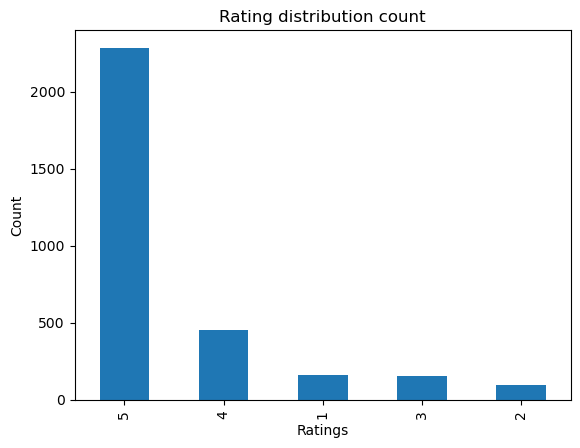

In [13]:
#Bar plot to visualize the total counts of each rating

data['rating'].value_counts().plot.bar()
plt.title('Rating distribution count')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

We can see that the data has more reviews with '5' ratings

In [14]:
#Analyzing 'feedback' column

#Distinct values of 'feedback' and its count 

print(f"Feedback value count: \n{data['feedback'].value_counts()}")

Feedback value count: 
feedback
1    2893
0     256
Name: count, dtype: int64


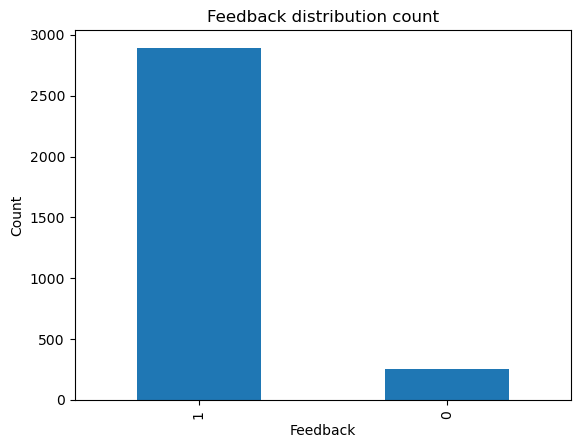

In [15]:
#Bar graph to visualize the total counts of each feedback

data['feedback'].value_counts().plot.bar()
plt.title('Feedback distribution count')
plt.xlabel('Feedback')
plt.ylabel('Count')
plt.show()

From the plot we can say that positive reviews(1) is more compared to negative reviews(0)

'rating' values for different values of 'feedback'

In [16]:
#Feedback = 0
data[data['feedback'] == 0]['rating'].value_counts()

rating
1    161
2     95
Name: count, dtype: int64

In [17]:
#Feedback = 1
data[data['feedback'] == 1]['rating'].value_counts()

rating
5    2286
4     455
3     152
Name: count, dtype: int64

If rating of a review is 1 or 2 then the feedback is 0 (negative) and if the rating is 3, 4 or 5 then the feedback is 1 (positive).

In [18]:
#Analyzing 'variation' column

#Distinct values of 'variation' and its count 

print(f"Variation value count: \n{data['variation'].value_counts()}")

Variation value count: 
variation
Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
Sandstone Fabric                 90
White                            90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: count, dtype: int64


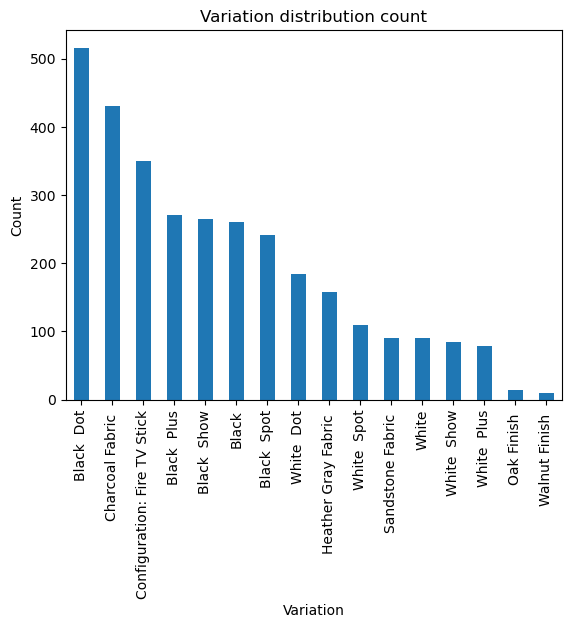

In [19]:
#Bar graph to visualize the total counts of each variation

data['variation'].value_counts().plot.bar()
plt.title('Variation distribution count')
plt.xlabel('Variation')
plt.ylabel('Count')
plt.show()

In [20]:
#Analyzing 'length' column

data['length'].describe()

count    3149.000000
mean      132.714513
std       182.541531
min         1.000000
25%        30.000000
50%        74.000000
75%       166.000000
max      2853.000000
Name: length, dtype: float64

[Text(0.5, 1.0, 'Distribution of length of review ')]

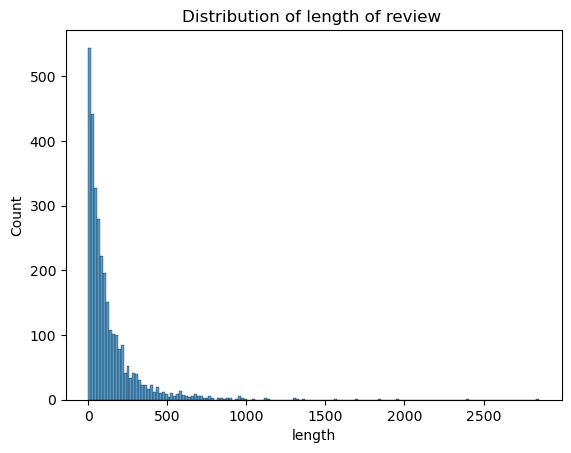

In [21]:
#Length analysis for full dataset
sns.histplot(data['length']).set(title='Distribution of length of review ')

[Text(0.5, 1.0, 'Distribution of length of review if feedback = 0')]

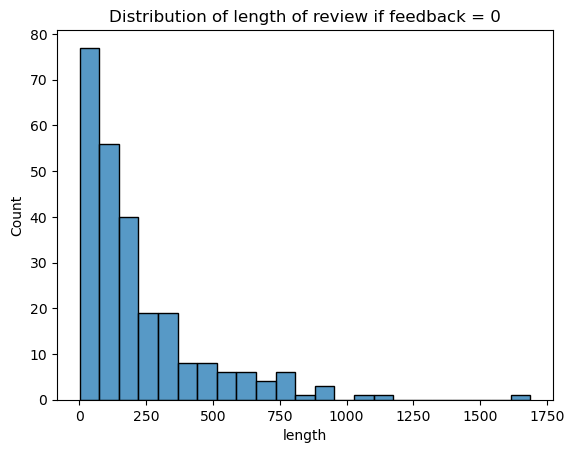

In [22]:
#Length analysis when feedback is 0 (negative)

sns.histplot(data[data['feedback']==0]['length']).set(title='Distribution of length of review if feedback = 0')

[Text(0.5, 1.0, 'Distribution of length of review if feedback = 1')]

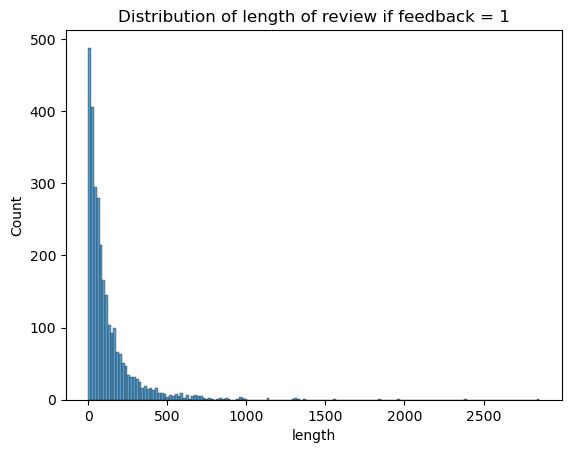

In [23]:
#Length analysis when feedback is 1 (positive)

sns.histplot(data[data['feedback']==1]['length']).set(title='Distribution of length of review if feedback = 1')

Downsampling the 'rating' column to address the imabalance in the dataset

In [24]:
from sklearn.utils import resample

In [152]:
# Separate majority and minority classes
data_5 = data[data['rating'] == 5]
data_4 = data[data['rating'] == 4]
data_3 = data[data['rating'] == 3]
data_2 = data[data['rating'] == 2]
data_1 = data[data['rating'] == 1]

In [153]:
# Downsample majority class(5 and 4)

data_5_downsampled = resample(data_5, 
                              replace=False,    # sample without replacement
                              n_samples=520,    # to match minority class
                              random_state=42)  

data_4_downsampled = resample(data_4, 
                              replace=False,    
                              n_samples=450,    
                              random_state=42)  


In [154]:
# Combine minority class with downsampled majority class

data_downsampled = pd.concat([data_5_downsampled, data_4_downsampled, data_3, data_2, data_1])

In [155]:
# Display new class counts

print(data_downsampled['rating'].value_counts())

rating
5    520
4    450
1    161
3    152
2     95
Name: count, dtype: int64


In [156]:
data_downsampled.shape

(1378, 6)

The data is downsampled

In [157]:
# Initialize CountVectorizer with English stop words and transform the 'verified_reviews' column into a word count matrix
cv = CountVectorizer(stop_words='english')
words = cv.fit_transform(data_downsampled.verified_reviews)


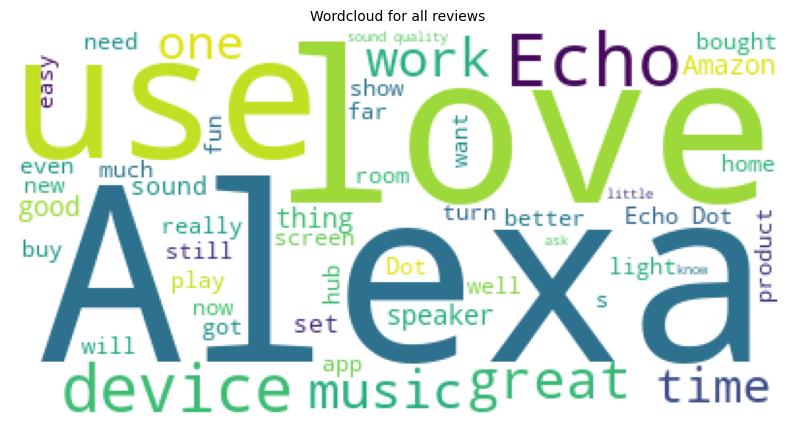

In [158]:
# Combine all reviews
reviews = " ".join([review for review in data_downsampled['verified_reviews']])
                        
# Initialize wordcloud object
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.title('Wordcloud for all reviews', fontsize=10)
plt.axis('off')
plt.show()

# Preprocessing and Modelling

In [159]:
# Preprocess the 'verified_reviews' column by cleaning, lowercasing, removing stop words, stemming, and adding to the corpus list
corpus = []
stemmer = PorterStemmer()
for i in range(0, data_downsampled.shape[0]):
  review = re.sub('[^a-zA-Z]', ' ', data_downsampled.iloc[i]['verified_reviews'])
  review = review.lower().split()
  review = [stemmer.stem(word) for 
            word in review if not word in STOPWORDS]
  review = ' '.join(review)
  corpus.append(review)

In [160]:
#Using Count Vectorizer to create bag of words

cv = CountVectorizer(max_features = 2500)

#Storing independent and dependent variables in X and y
X = cv.fit_transform(corpus).toarray()
y = data_downsampled['feedback'].values

In [161]:
#Saving the Count Vectorizer
pickle.dump(cv, open('../Models/countVectorizer.pkl', 'wb'))

In [162]:
#Checking the shape of X and y
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (1378, 2178)
y shape: (1378,)


In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 15)

print(f"X train: {X_train.shape}")
print(f"y train: {y_train.shape}")
print(f"X test: {X_test.shape}")
print(f"y test: {y_test.shape}")

X train: (964, 2178)
y train: (964,)
X test: (414, 2178)
y test: (414,)


In [164]:
print(f"X train max value: {X_train.max()}")
print(f"X test max value: {X_test.max()}")

X train max value: 9
X test max value: 12


In [165]:
#scale X_train and X_test so that all values are between 0 and 1.

scaler = MinMaxScaler()

X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.transform(X_test)

In [166]:
#Saving the scaler model
pickle.dump(scaler, open('../Models/scaler.pkl', 'wb'))

# Applying ML Algorithms

## Random Forest

In [167]:
#Fitting scaled X_train and y_train on Random Forest Classifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train_scl, y_train)

RandomForestClassifier()

In [168]:
#Accuracy of the model on training and testing data
 
print("Training Accuracy :", model_rf.score(X_train_scl, y_train))
print("Testing Accuracy :", model_rf.score(X_test_scl, y_test))

Training Accuracy : 0.983402489626556
Testing Accuracy : 0.855072463768116


In [169]:
#Predicting on the test set
y_preds = model_rf.predict(X_test_scl)

In [170]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_preds)

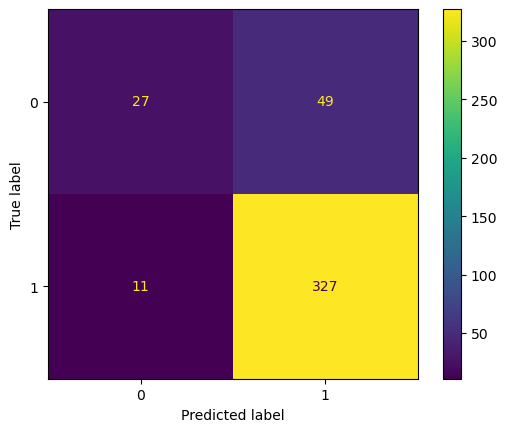

In [171]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_rf.classes_)
cm_display.plot()
plt.show()

## K fold cross-validation

In [172]:
accuracies = cross_val_score(estimator = model_rf, X = X_train_scl, y = y_train, cv = 10)

print("Accuracy :", accuracies.mean())
print("Standard Variance :", accuracies.std())

Accuracy : 0.8599763745704466
Standard Variance : 0.025404791557917077


In [173]:
#Applying grid search to get the optimal parameters on random forest
params = {
    'bootstrap': [True],
    'max_depth': [80, 100],
    'min_samples_split': [8, 12],
    'n_estimators': [100, 300]
}

In [174]:
cv_object = StratifiedKFold(n_splits = 2)

grid_search = GridSearchCV(estimator = model_rf, param_grid = params, cv = cv_object, verbose = 0, return_train_score = True)
grid_search.fit(X_train_scl, y_train.ravel())

GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'max_depth': [80, 100],
                         'min_samples_split': [8, 12],
                         'n_estimators': [100, 300]},
             return_train_score=True)

In [175]:
#Getting the best parameters from the grid search

print("Best Parameter Combination : {}".format(grid_search.best_params_))

Best Parameter Combination : {'bootstrap': True, 'max_depth': 100, 'min_samples_split': 12, 'n_estimators': 100}


In [176]:
print("Cross validation mean accuracy on train set : {}".format(grid_search.cv_results_['mean_train_score'].mean()*100))
print("Cross validation mean accuracy on test set : {}".format(grid_search.cv_results_['mean_test_score'].mean()*100))
print("Accuracy score for test set :", accuracy_score(y_test, y_preds))

Cross validation mean accuracy on train set : 96.78423236514523
Cross validation mean accuracy on test set : 83.22095435684646
Accuracy score for test set : 0.855072463768116


## XgBoost

In [116]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train_scl, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [117]:
#Accuracy of the model on training and testing data
 
print("Training Accuracy :", model_xgb.score(X_train_scl, y_train))
print("Testing Accuracy :", model_xgb.score(X_test_scl, y_test))

Training Accuracy : 0.9556868537666174
Testing Accuracy : 0.8075601374570447


In [118]:
y_preds = model_xgb.predict(X_test)

In [119]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_preds)
print(cm)

[[ 37  37]
 [ 23 194]]


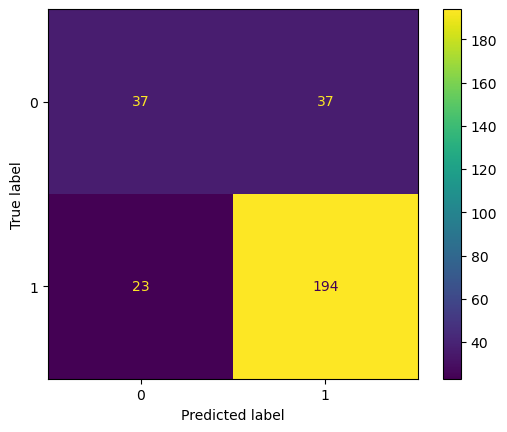

In [120]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_xgb.classes_)
cm_display.plot()
plt.show()

In [121]:
#Saving the XGBoost classifier
pickle.dump(model_xgb, open('../Models/model_xgb.pkl', 'wb'))

## Decision Tree Classifier

In [122]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train_scl, y_train)

DecisionTreeClassifier()

In [123]:
#Accuracy of the model on training and testing data
 
print("Training Accuracy :", model_dt.score(X_train_scl, y_train))
print("Testing Accuracy :", model_dt.score(X_test_scl, y_test))

Training Accuracy : 0.983751846381093
Testing Accuracy : 0.7594501718213058


In [124]:
y_preds = model_dt.predict(X_test)

In [125]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_preds)
print(cm)

[[ 36  38]
 [ 42 175]]


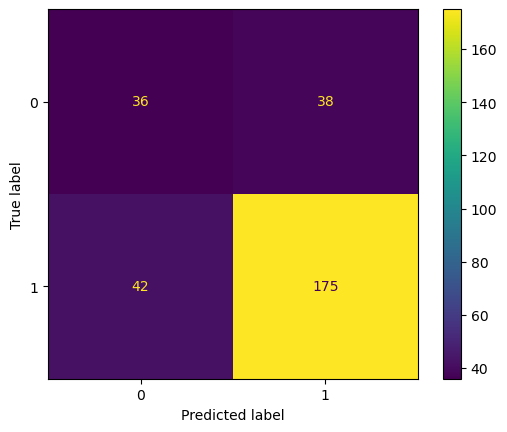

In [126]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_dt.classes_)
cm_display.plot()
plt.show()